# Minimum free energy paths in analytical potential energy landscapes

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import stringmethod

## Potential from Weinan E et al. J Chem Phys (2007)

We'll first apply the string method to the example described in the simplified string method paper (https://aip.scitation.org/doi/pdf/10.1063/1.2720838).

In [2]:
def example_potential(x, y):
    return (1 - x ** 2 - y ** 2) ** 2 + y ** 2 / (x ** 2 + y ** 2)

In [3]:
x = np.linspace(-1.2, 1.2, 100)
y = np.linspace(-0.2, 1.2, 100)
xx, yy = np.meshgrid(x, y)
V = example_potential(xx, yy)

### Setup String2D

In [4]:
S = stringmethod.String2D(x, y, V)

Plot potential:

(<Figure size 1800x1200 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdd4a929fd0>)

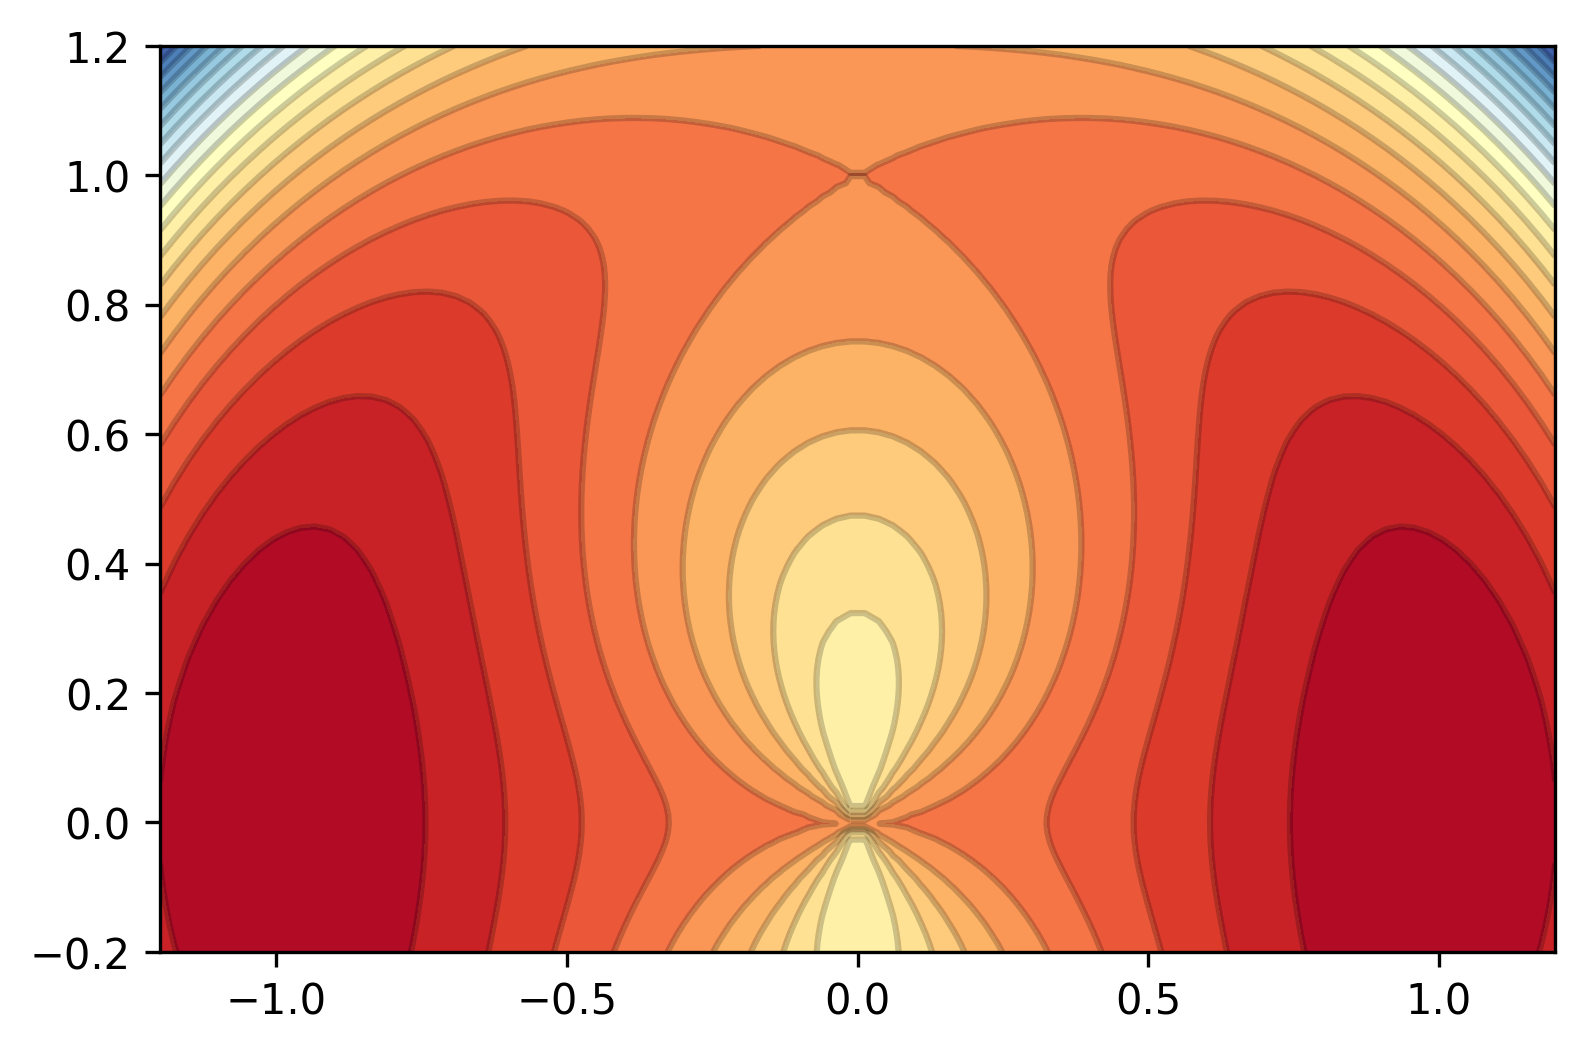

In [5]:
S.plot_V(levels=20)

Plot gradients:

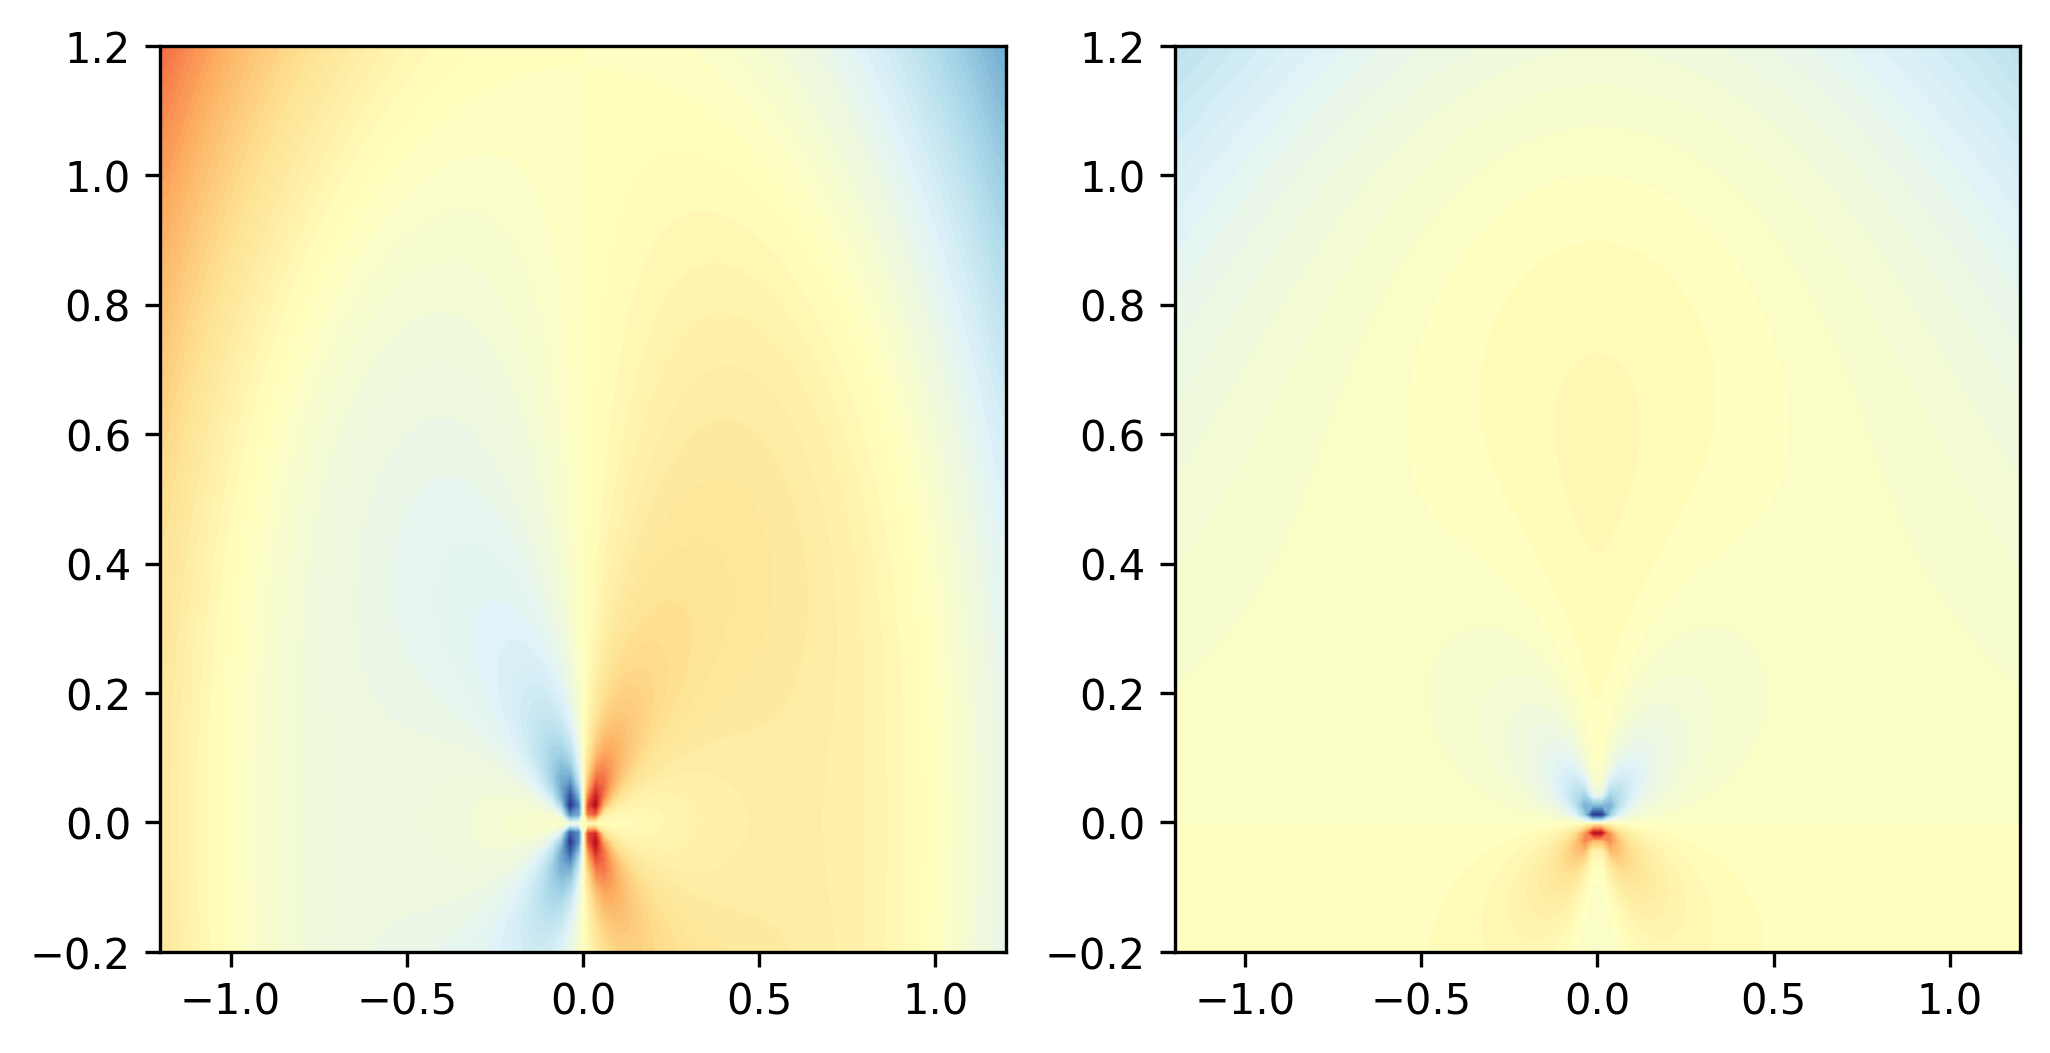

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=300)
ax[0].contourf(xx, yy, S.gradX, levels=100, cmap="RdYlBu")
ax[1].contourf(xx, yy, S.gradY, levels=100, cmap="RdYlBu")

### Compute string

In [7]:
S.compute_mep(begin=[-1, 0], mid=[[0, 1]], end=[1, 0], spline_order=1, maxsteps=100, traj_every=10)

 10%|████▏                                     | 10/100 [00:05<00:36,  2.47it/s]

Change in string: 0.0151368541


 20%|████████▍                                 | 20/100 [00:08<00:30,  2.67it/s]

Change in string: 0.0169037913


 30%|████████████▌                             | 30/100 [00:12<00:30,  2.31it/s]

Change in string: 0.0038288621


 40%|████████████████▊                         | 40/100 [00:16<00:23,  2.60it/s]

Change in string: 0.0011314603


 50%|█████████████████████                     | 50/100 [00:20<00:20,  2.47it/s]

Change in string: 0.0003226378


 60%|█████████████████████████▏                | 60/100 [00:25<00:16,  2.47it/s]

Change in string: 0.0000904577


 70%|█████████████████████████████▍            | 70/100 [00:29<00:13,  2.27it/s]

Change in string: 0.0000261156


 80%|█████████████████████████████████▌        | 80/100 [00:34<00:08,  2.26it/s]

Change in string: 0.0000075852


 90%|█████████████████████████████████████▊    | 90/100 [00:38<00:04,  2.45it/s]

Change in string: 0.0000022113


100%|█████████████████████████████████████████| 100/100 [00:44<00:00,  2.26it/s]

Change in string: 0.0000006470


(<Figure size 1800x1200 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdd4ca2c0d0>)

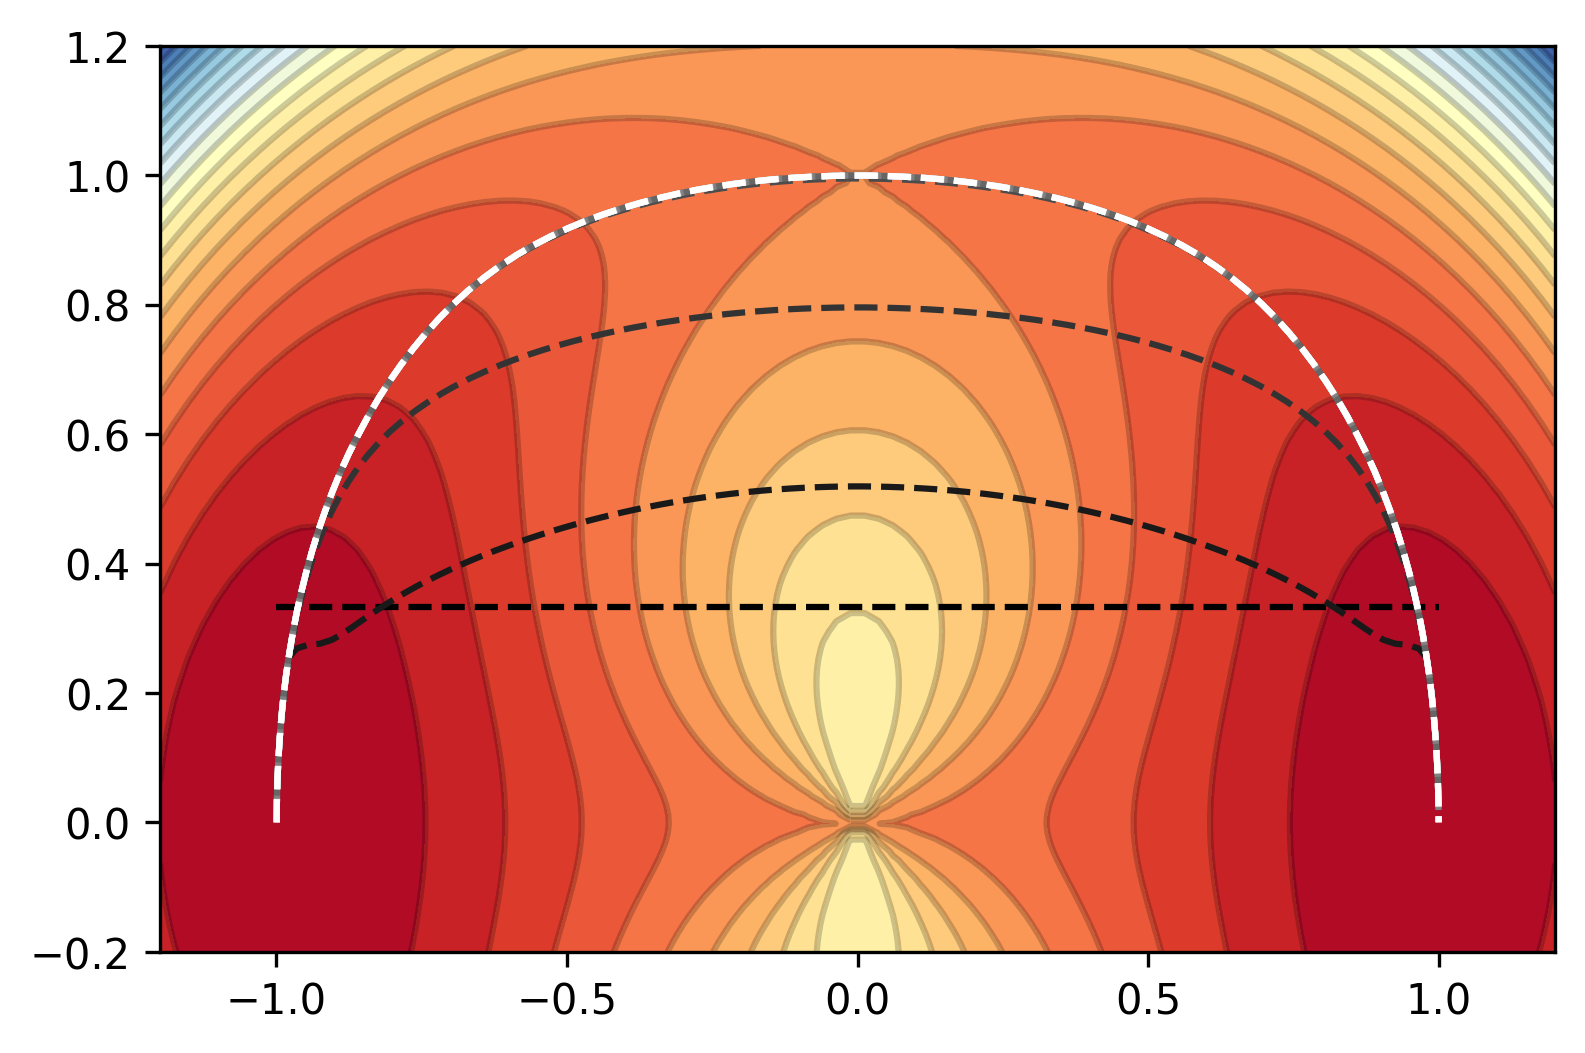

In [8]:
S.plot_string_evolution(levels=20)

(<Figure size 1800x1200 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdd4be21a50>)

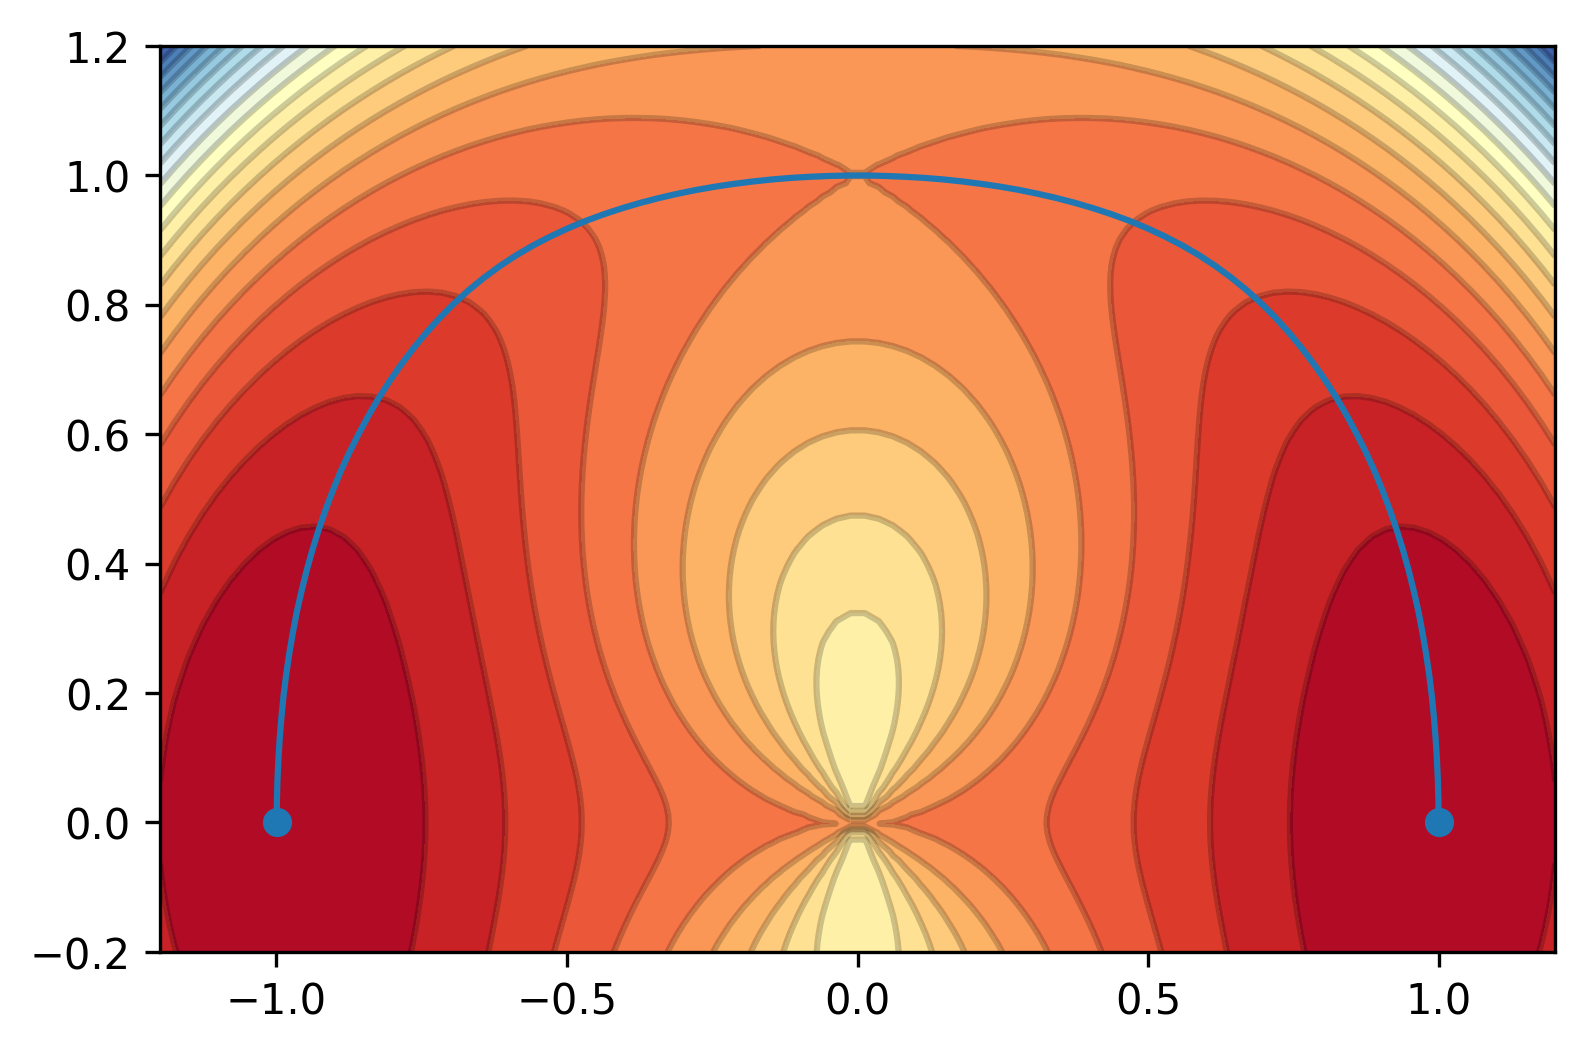

In [9]:
S.plot_mep(levels=20)

## Muller-Brown potential

In [19]:
def muller_brown(x, y):
    a = [-1, -1, -6.5, 0.7]
    b = [0, 0, 11, 0.6]
    c = [-10, -10, -6.5, 0.7]
    A = [-200, -100, -170, 15]
    x_bar = [1, 0, -0.5, -1]
    y_bar = [0, 0.5, 1.5, 1]

    value = 0
    for i in range(4):
        value += A[i] * np.exp(a[i] * (x - x_bar[i]) ** 2 + b[i] * (x - x_bar[i]) * (y - y_bar[i]) + c[i] * (y - y_bar[i]) ** 2)
    return value

In [20]:
x = np.linspace(-1.5, 1.2, 200)
y = np.linspace(-0.2, 2, 200)
xx, yy = np.meshgrid(x, y)
V = muller_brown(xx, yy)

In [21]:
S = stringmethod.String2D(x, y, V)

(<Figure size 1800x1200 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdd4d832590>)

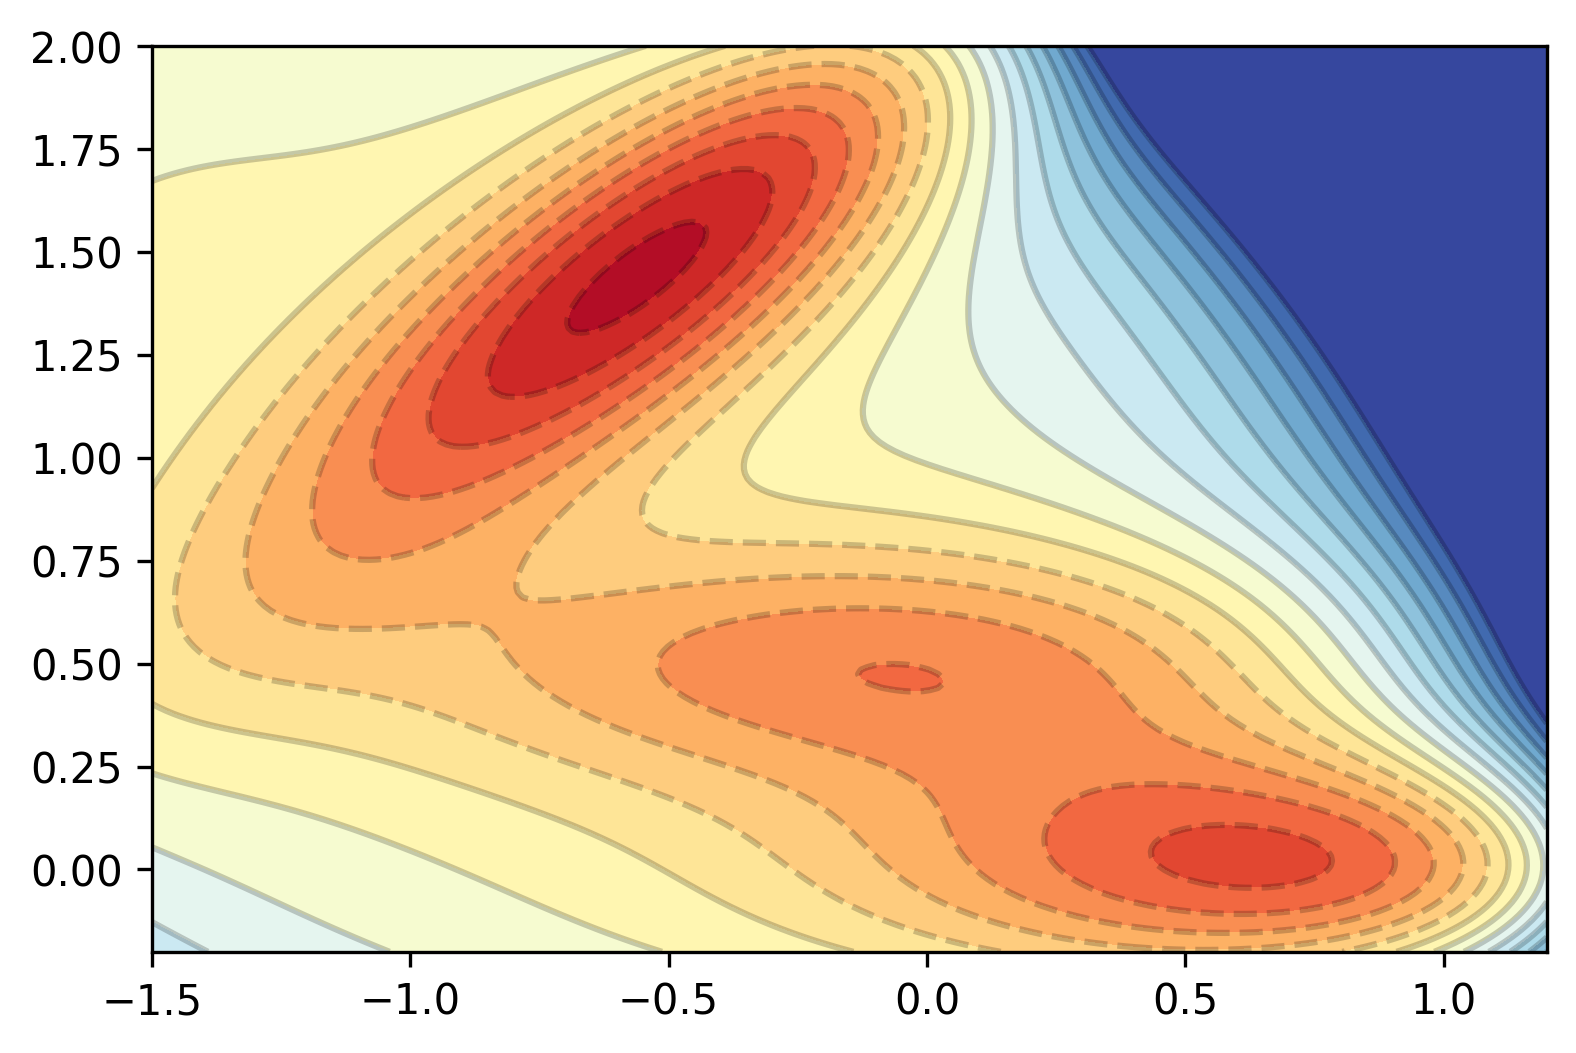

In [22]:
S.plot_V(clip_max=200, levels=20)

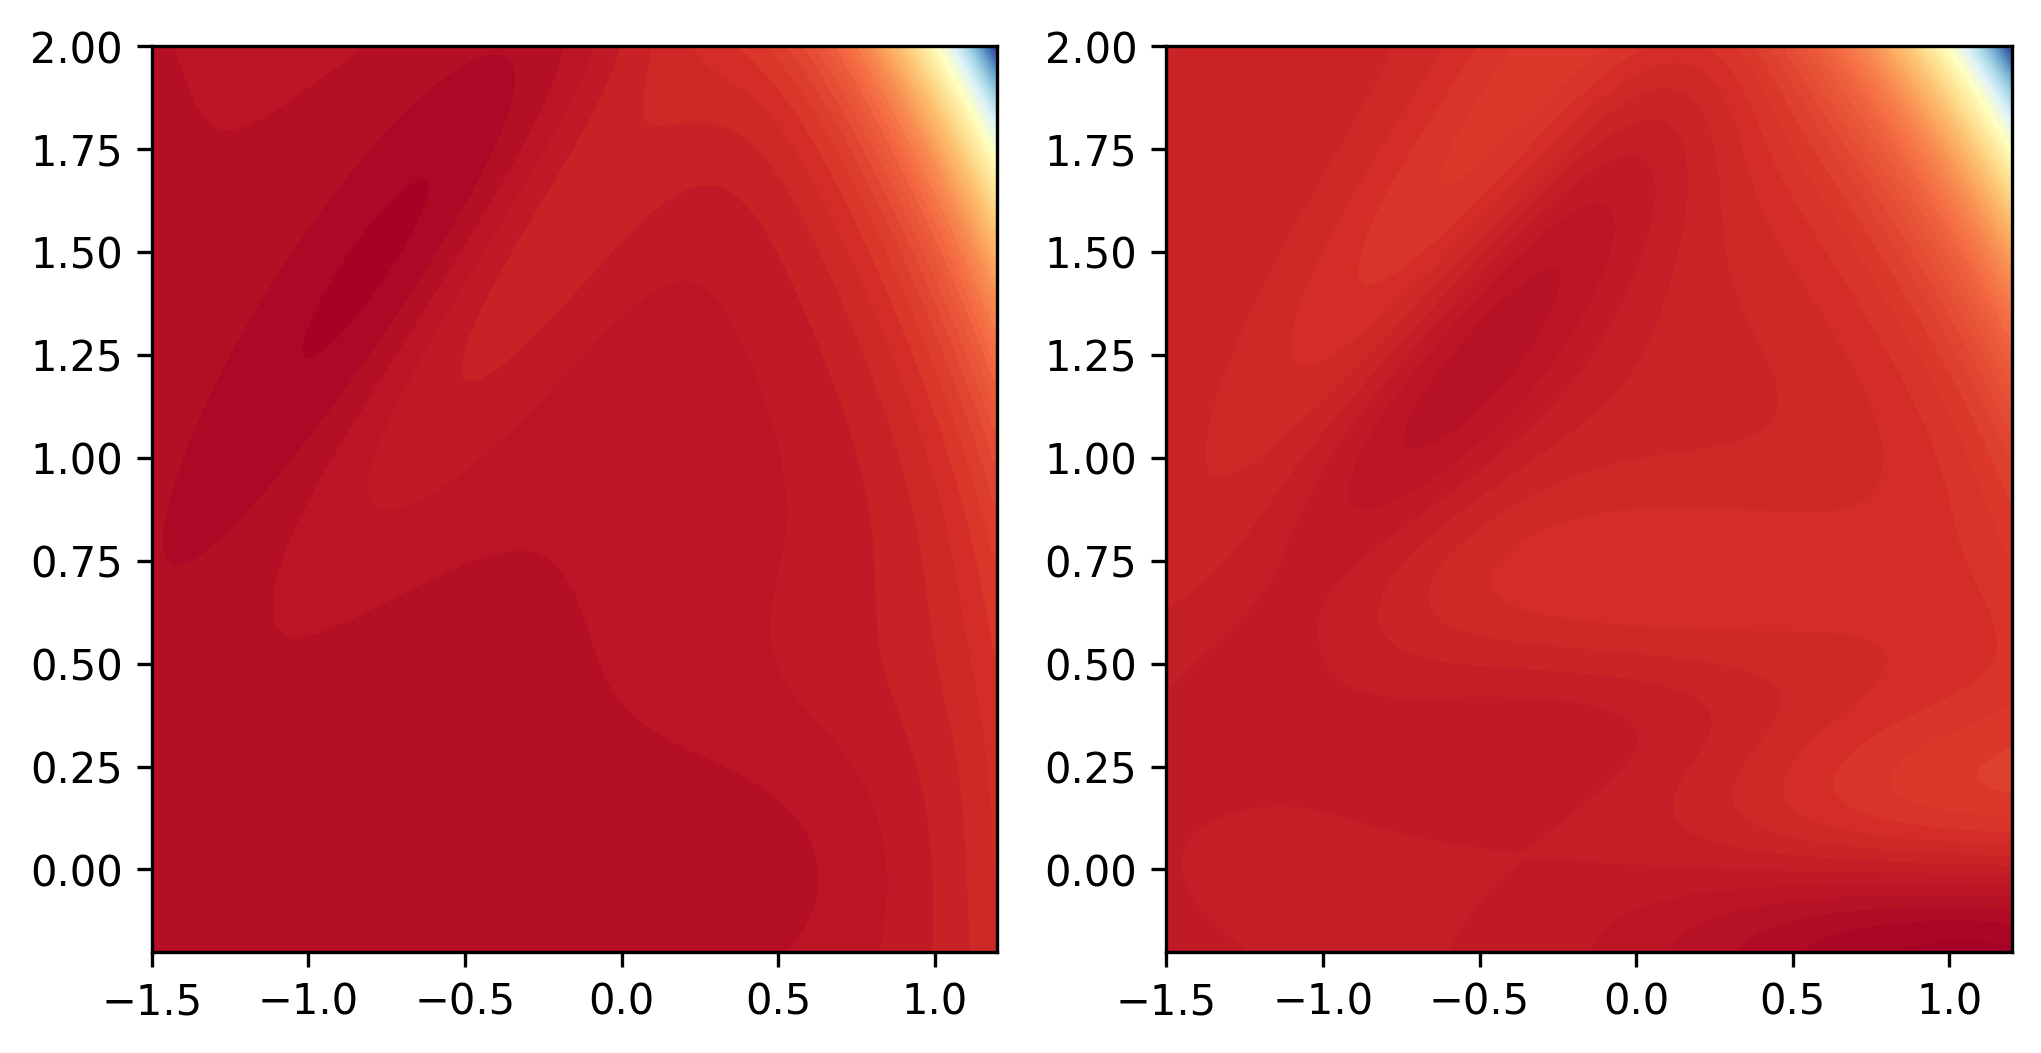

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=300)
ax[0].contourf(xx, yy, S.gradX, levels=100, cmap="RdYlBu")
ax[1].contourf(xx, yy, S.gradY, levels=100, cmap="RdYlBu")

### Compute string

In [24]:
S.compute_mep(begin=[-0.558, 1.442], end=[0.623, 0.028], maxsteps=100, traj_every=10, npts=200)

 10%|████▏                                     | 10/100 [00:18<02:53,  1.93s/it]

Change in string: 0.0098084056


 20%|████████▍                                 | 20/100 [00:36<02:21,  1.77s/it]

Change in string: 0.0114945118


 30%|████████████▌                             | 30/100 [00:54<02:10,  1.87s/it]

Change in string: 0.0091021606


 40%|████████████████▊                         | 40/100 [01:13<01:49,  1.83s/it]

Change in string: 0.0312482101


 50%|█████████████████████                     | 50/100 [01:31<01:29,  1.80s/it]

Change in string: 0.0485610551


 60%|█████████████████████████▏                | 60/100 [01:50<01:11,  1.80s/it]

Change in string: 0.0425849302


 70%|█████████████████████████████▍            | 70/100 [02:08<00:54,  1.82s/it]

Change in string: 0.0227829086


 80%|█████████████████████████████████▌        | 80/100 [02:26<00:36,  1.81s/it]

Change in string: 0.0370209703


 90%|█████████████████████████████████████▊    | 90/100 [02:44<00:18,  1.82s/it]

Change in string: 0.0265676063


100%|█████████████████████████████████████████| 100/100 [03:02<00:00,  1.83s/it]

Change in string: 0.0212423785


(<Figure size 1800x1200 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdd4e7a7a50>)

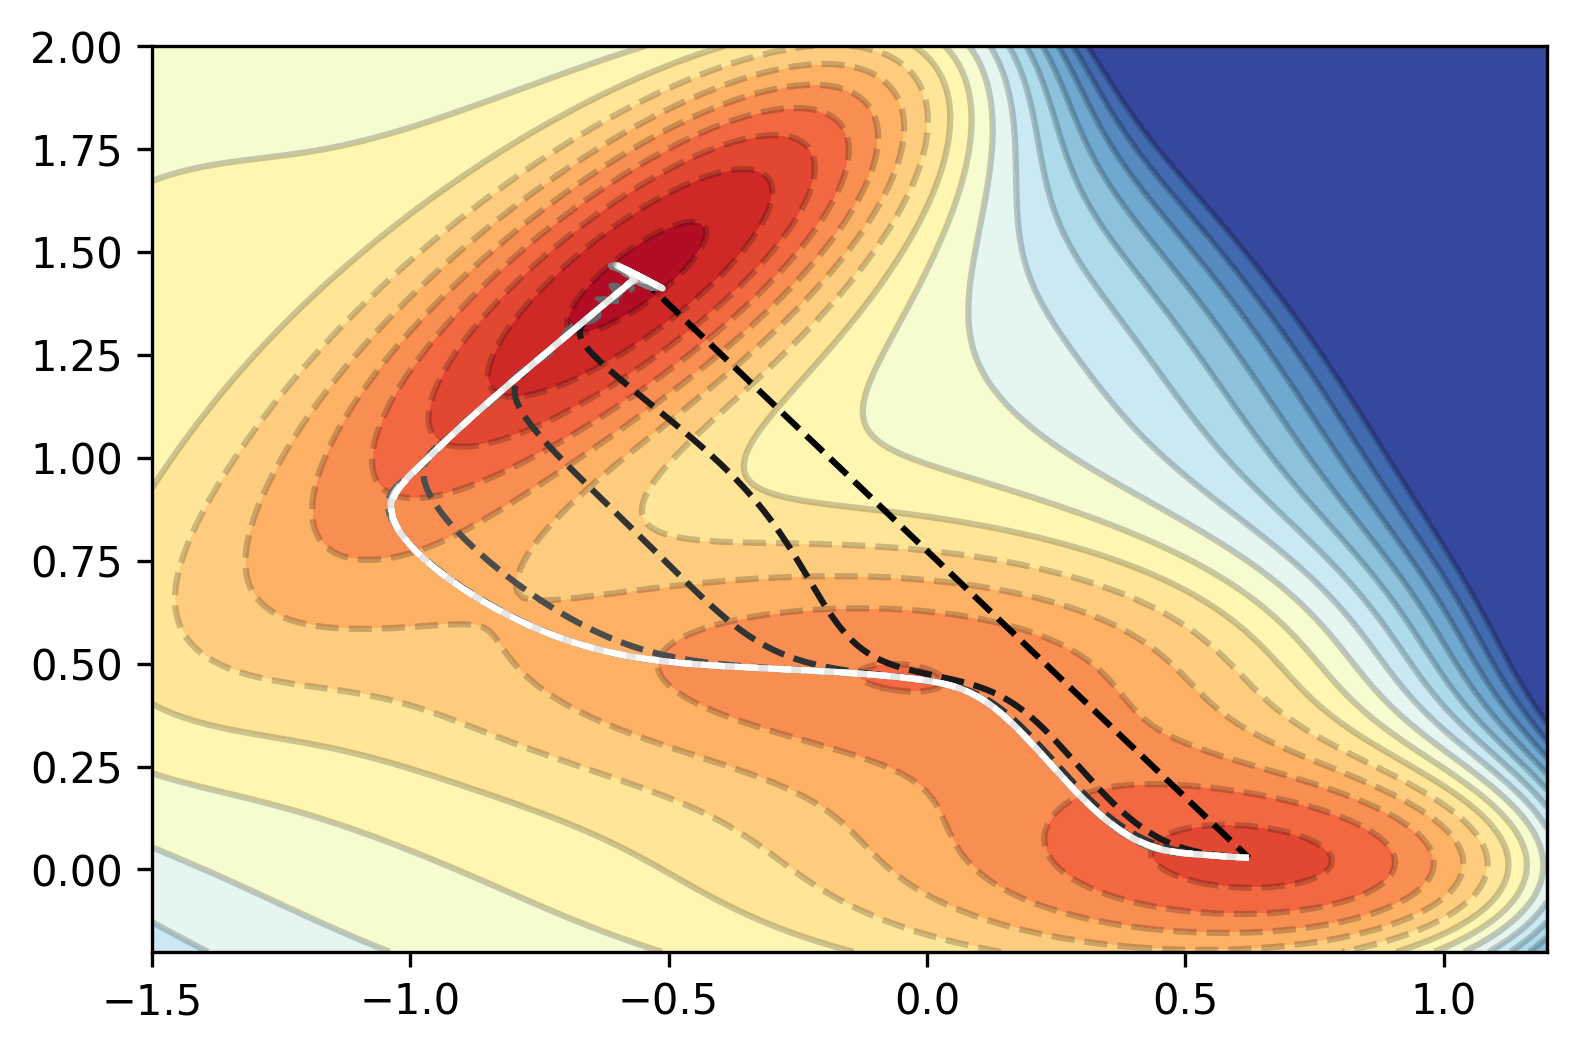

In [25]:
S.plot_string_evolution(clip_max=200, levels=20)

(<Figure size 1800x1200 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdd4e89a810>)

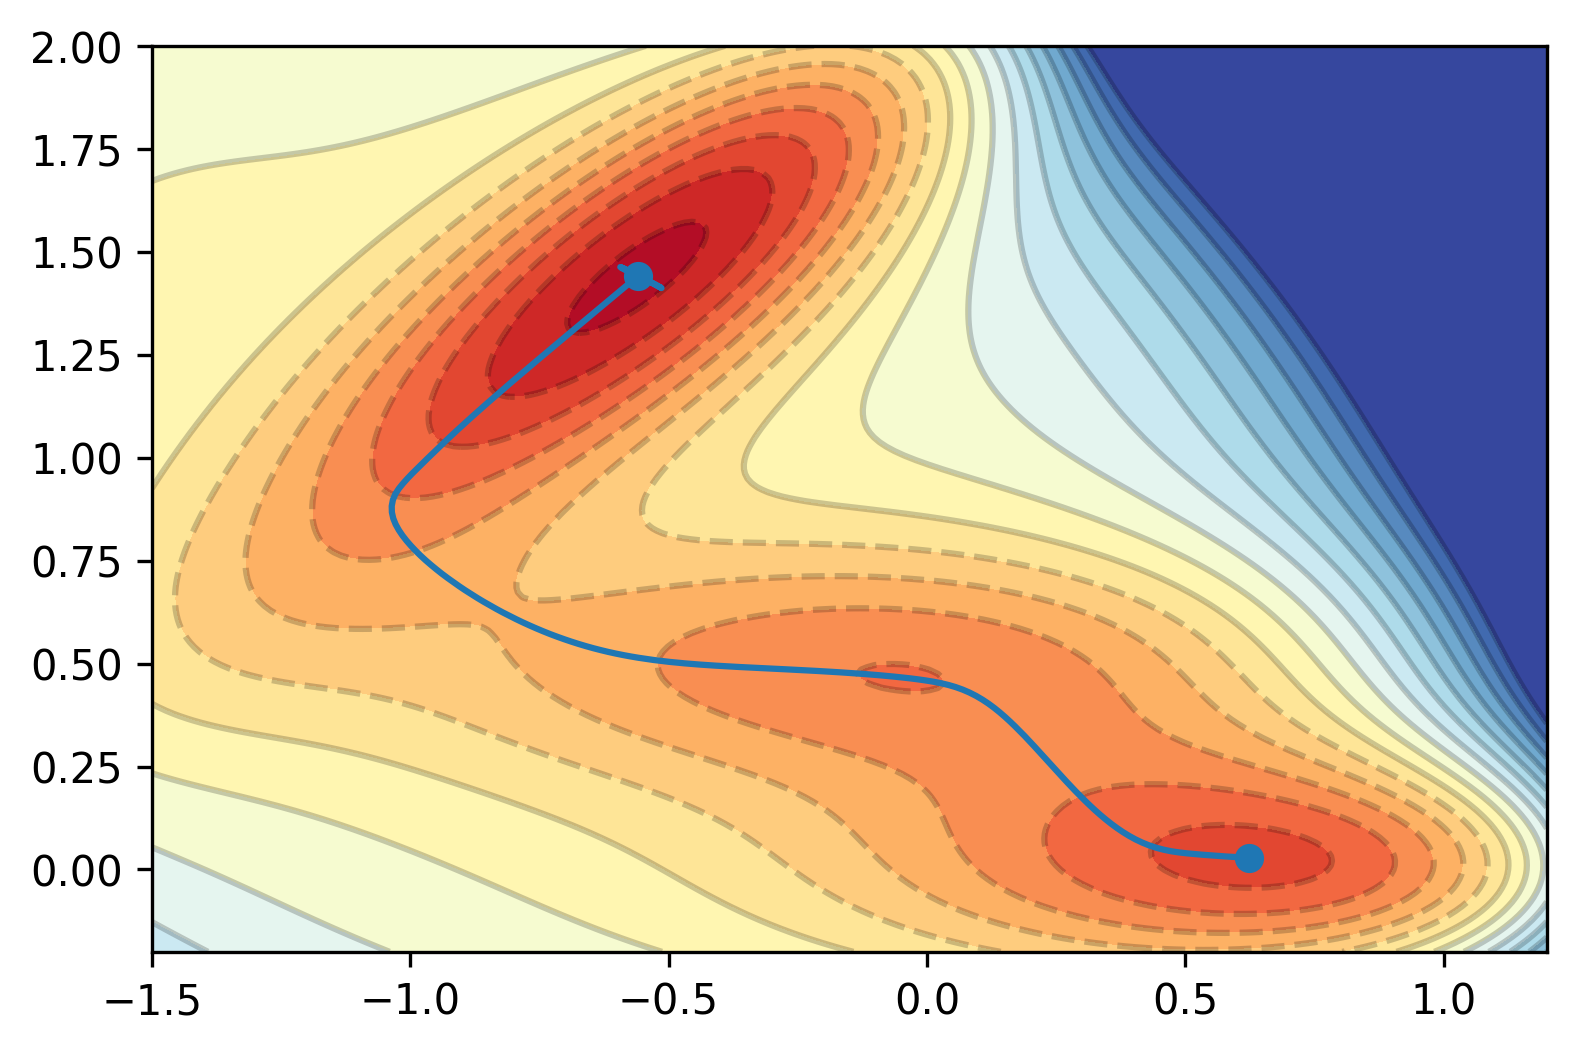

In [26]:
S.plot_mep(clip_max=200, levels=20)